# Análisis Factorial Exploratorio (AFE)

>Este tutorial es una selección y adaptación al español del libro [Multivariate Data Analysis](https://www.cengage.co.uk/books/9781473756540/) de Joseph F. Hair et al.

> Requiere cargar el archivo ["euthan.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/euthan.sav) en el repositorio local. 


## Diseño de un AFE

El análisis factorial exploratorio se realiza con mayor frecuencia sólo en variables métricas (cuantitativas), aunque existen métodos especializados para el uso de variables ficticias. 

Pueden incluirse un número limitado de “variables ficticias” en un conjunto de variables métricas que se analizan factorialmente siempre que representen atributos binarios.

### Tamaño de muestra

Regla de dedo: Si se está diseñando un estudio para revelar la estructura de los factores, trate de tener al menos cinco variables para cada factor propuesto.

- La muestra debe tener más observaciones que variables.
- El tamaño mínimo absoluto de la muestra debe ser de 50 observaciones, siendo 100 observaciones el mínimo preferido.
- Aumente la muestra a medida que aumenta la complejidad del análisis factorial (es decir, el número de variables y / o factores retenidos).
- Esfuércese por maximizar el número de observaciones por variable, con una proporción deseada de al menos 5 observaciones por variable.
- Las comunalidades más altas entre las variables brindan soporte para tamaños de muestra más pequeños, en igualdad de condiciones.

## Supuestos de un AFE

Un supuesto básico del análisis factorial es que **existe alguna estructura subyacente en el conjunto de variables seleccionadas**. La presencia de variables correlacionadas y la posterior definición de factores no garantizan la relevancia, incluso si cumplen con los requisitos estadísticos. 

Es responsabilidad del investigador asegurarse de que los patrones observados sean conceptualmente válidos y apropiados para estudiar con análisis factorial exploratorio, porque la técnica no tiene ningún medio para determinar la idoneidad más que las correlaciones entre variables. 

Por ejemplo, no es apropiado mezclar variables dependientes e independientes en un análisis de un solo factor y luego usar los factores derivados para respaldar las relaciones de dependencia.

### Supuestos estadísticos

El investigador debe asegurarse de que la matriz de datos tenga correlaciones suficientes para justificar la aplicación del AFE. 

Si se encuentra que todas las correlaciones son bajas, o que todas las correlaciones son iguales (lo que denota que no existe una estructura para agrupar las variables), entonces el investigador debe cuestionar la aplicación del AFE. Para ello, se encuentran disponibles varios enfoques:

#### Inspección visual

Si la inspección visual revela un **pequeño número de variables con correlaciones mayores de .30**, entonces el AFE probablemente sea inapropiado.

Veamos un ejemplo:


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_spss('euthan.sav')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,0.857588,0.785601,0.119556,0.154735,0.686161,0.865330,0.272019,0.041718,0.881063,0.916052,0.039223,0.011506
1,-0.867251,-0.472065,-0.717338,-0.781541,-0.402548,-0.270416,-0.595042,-1.022102,-0.072087,-1.728400,-0.784465,0.011506
2,0.857588,0.785601,-1.554233,0.154735,0.686161,0.865330,0.272019,0.041718,0.881063,0.916052,1.686599,0.833058
3,-0.004831,0.785601,-1.554233,0.154735,0.686161,0.865330,1.139081,1.105538,-1.025236,0.916052,0.039223,0.011506
4,-0.867251,-0.472065,0.956451,-0.781541,-1.491256,-0.270416,0.272019,0.041718,-1.025236,0.034568,0.039223,0.833058
...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.857588,-0.472065,-1.554233,0.154735,0.686161,-0.270416,-0.595042,0.041718,-0.072087,0.916052,0.039223,0.011506
353,0.857588,0.785601,-0.717338,-0.781541,0.686161,0.865330,-0.595042,-1.022102,0.881063,0.916052,-0.784465,-0.810046
354,0.857588,0.785601,-0.717338,1.091011,0.686161,0.865330,1.139081,0.041718,0.881063,0.916052,1.686599,0.833058
355,-0.004831,-0.472065,-0.717338,0.154735,0.686161,-0.270416,0.272019,0.041718,-0.072087,0.034568,0.862911,0.011506


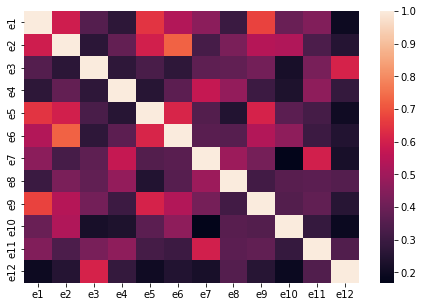

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7.5,5))
sns.heatmap(scaled_df.corr());

Las correlaciones entre variables también se pueden analizar calculando las correlaciones parciales entre variables. Una correlación parcial es la correlación que no se explica cuando se tienen en cuenta los efectos de otras variables. 

Si existen factores “verdaderos” en los datos, la correlación parcial debe ser pequeña, porque la variable puede explicarse por la carga de las variables sobre los factores. Si las correlaciones parciales son altas, lo que indica es que no hay factores subyacentes, entonces el análisis factorial exploratorio no es apropiado.

Una regla general sería considerar las correlaciones parciales superiores a 0,7 como altas.

Veamos las correlaciones parciales en nuestro ejemplo:

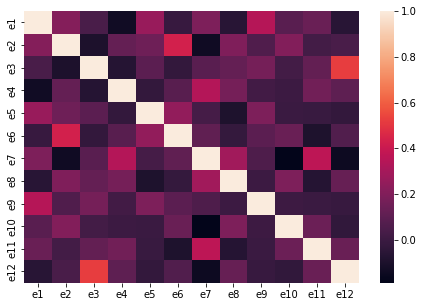

In [4]:
import pingouin as pg

plt.figure(figsize=(7.5,5))
sns.heatmap(scaled_df.pcorr());

Podemos apreciar que son pocas las variables que presentan correlaciones por encima de 0.7.

#### Prueba de Bartlett

La prueba de esfericidad de Bartlett es una prueba estadística de la presencia de correlaciones entre las variables. Proporciona la significancia estadística que indica que la matriz de correlación tiene correlaciones significativas entre al menos algunas de las variables. 

El investigador debe tener en cuenta, sin embargo, que al aumentar el tamaño de la muestra, la prueba de Bartlett se vuelve más sensible para detectar correlaciones entre las variables.

Apliquemos la prueba de Bartlett en nuestro ejemplo:

In [5]:
!pip install factor_analyzer

In [6]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

statistic, p_value = calculate_bartlett_sphericity(scaled_df)
print("Chi-cuadrado: ", statistic)
print("Valor p: ", p_value)

Chi-cuadrado:  2047.1262764312712
Valor p:  0.0


Una prueba de esfericidad de Bartlett estadísticamente significativa ($p < 0.50$) indica que existen correlaciones suficientes entre las variables para proceder.

#### Medida de adecuación del muestreo (MSA)

Este índice va de 0 a 1, llegando a 1 cuando cada variable puede ser perfectamente predicha sin error por las demás variables.

La MSA se puede interpretar con las siguientes pautas:
- $> .80$: meritorio
- $> .70$: medio
- $> .60$: mediocre
- $> .50$: miserable
- $< .50$: inaceptable.

El MSA aumenta a medida que (1) aumenta el tamaño de la muestra, (2) aumentan las correlaciones promedio, (3) aumenta el número de variables o (4) disminuye el número de factores.

En general, **los valores de MSA deben exceder .50 tanto para la prueba general como para cada variable individual**. 

Las variables con valores inferiores a .50 deben omitirse del análisis factorial una a la vez, omitiendo la más pequeña cada vez.

Apliquemos esta medida en nuestro ejemplo:

In [7]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_per_variable, kmo_total = calculate_kmo(scaled_df)

print("MSA general: ", kmo_total)
print("MSA individual: ", kmo_per_variable)

MSA general:  0.8645475574059576
MSA individual:  [0.88109859 0.86667988 0.80575109 0.86839977 0.91121343 0.88275977
 0.80074253 0.86904428 0.91963489 0.88876132 0.87669668 0.75080834]


Nuestro ejemplo cumple con medidas de MSA adecuadas tanto a nivel individual como a nivel general.

## Determinar el número de factores a extraer

Al momento de extraer factores, el primer factor puede verse como el mejor resumen individual de las relaciones lineales exhibidas en los datos. El segundo factor se define como la segunda mejor combinación lineal de las variables, sujeta a la restricción de que es ortogonal al primer factor.

Para ser ortogonal al primer factor, el segundo factor debe derivarse solo de la varianza restante después de que se haya extraído el primer factor. Por lo tanto, el segundo factor puede definirse como la combinación lineal de variables que explica la mayor varianza que aún no se explica después de que el efecto del primer factor se ha eliminado de los datos.

El proceso continúa extrayendo factores que representan cantidades cada vez más pequeñas de variación hasta que se explica toda la varianza.

La pregunta clave es: ¿cuántos factores extraer o retener?

Al decidir cuándo dejar de factorizar (es decir, cuántos factores extraer), el investigador debe combinar una base conceptual (¿cuántos factores deberían estar en la estructura?) con alguna evidencia empírica (¿cuántos factores pueden ser razonablemente respaldados?).

No se ha desarrollado una base cuantitativa definitiva para decidir el número de factores a extraer. Sin embargo, actualmente se utilizan las siguientes reglas para definir para la cantidad de factores a extraer:

- Criterio de Kaiser
- Criterio de la varianza explicada
- Criterio Scree plot
- Análisis paralelo de Horn

#### Criterio de Kaiser

Retener factores con autovalores superiores a 1.0. 

Esta técnica es sencilla de aplicar, y el fundamento es que cualquier factor individual debe tener en cuenta la varianza de al menos una sola variable si se quiere conservar para la interpretación. **Se recomienda para el Análisis de Componentes Principales, y no para el análisis factorial común**. 

Apliquemos este criterio a nuestro ejemplo:

In [17]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=12,rotation=None)
fa.fit(scaled_df)
original_eigen_values, common_factor_eigen_values = fa.get_eigenvalues()

print("Autovalores PCA: ",original_eigen_values)
print("Autovalores AFC: ",common_factor_eigen_values)

Autovalores PCA:  [5.32321896 1.53556559 1.06328152 0.9411086  0.63476907 0.54958576
 0.41299731 0.37178063 0.33918213 0.30635681 0.29828992 0.22386371]
Autovalores AFC:  [ 5.04389603e+00  1.24894095e+00  7.74931376e-01  6.26468318e-01
  2.72607317e-01  2.13524722e-01  1.09535054e-01  7.89185716e-02
  4.69240153e-02  3.21792672e-02  9.40977794e-03 -1.69990511e-06]


Según este criterio deberíamos preservar solo los tres primeros factores.

#### Criterio de la varianza explicada

Retener suficientes factores para cumplir con un porcentaje específico de varianza explicada, generalmente 60 por ciento o más.

El propósito es asegurar la importancia práctica de los factores derivados asegurándose de que expliquen al menos una cantidad específica de varianza.

Apliquemos este criterio a nuestro ejemplo:

In [21]:
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()

print("Suma de cargas factoriales al cuadrado: ",variance) # Sum of squared loadings
print("Varianza proporcional: ",proportional_variance)
print("Varianza acumulada: ",cumulative_variance)

Suma de cargas factoriales al cuadrado:  [5.04389587 1.24894077 0.77493114 0.62646817 0.27260714 0.21352459
 0.10953488 0.07891844 0.04692393 0.03217911 0.00940965 0.        ]
Varianza proporcional:  [0.42032466 0.1040784  0.0645776  0.05220568 0.02271726 0.01779372
 0.00912791 0.00657654 0.00391033 0.00268159 0.00078414 0.        ]
Varianza acumulada:  [0.42032466 0.52440305 0.58898065 0.64118633 0.66390359 0.68169731
 0.69082521 0.69740175 0.70131208 0.70399367 0.70477781 0.70477781]


Según este criterio, deberíamos preservar 4 factores para explicar al menos el 60% de la varianza.

#### Criterio de Catell

Recuerda que los factores extraídos contienen varianza común y única. Aunque todos los factores contienen al menos alguna varianza única, la proporción de varianza única es sustancialmente mayor en los factores posteriores. 

La prueba del codo se utiliza para identificar el número óptimo de factores que se pueden extraer antes de que la cantidad de varianza única comience a dominar la estructura de varianza común.

La prueba de criba se obtiene graficando los autovalores contra el número de factores en su orden de extracción, y la forma de la curva resultante se usa para evaluar el punto de corte.



Apliquemos este criterio a nuestro ejemplo:

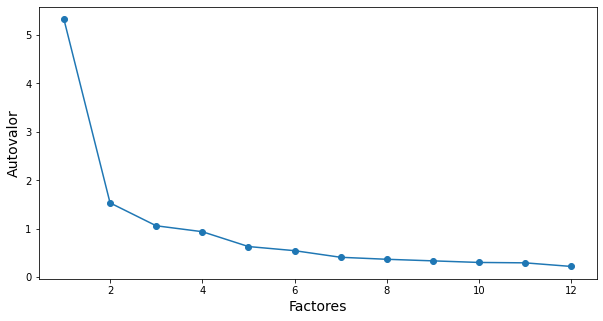

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))
plt.scatter(np.arange(original_eigen_values.size)+1,original_eigen_values)
plt.plot(np.arange(original_eigen_values.size)+1,original_eigen_values)
plt.xlabel('Factores',size=14);
plt.ylabel('Autovalor',size=14);

Comenzando con el primer factor, la pendiente se inclina abruptamente hacia abajo inicialmente y luego se convierte lentamente en una línea aproximadamente horizontal en un punto de inflexión denominado por muchos como el "codo". 

Se considera que este punto en el que la curva comienza a enderezarse representa los factores que contienen una varianza más única que común y, por lo tanto, son menos adecuados para la retención.

En nuestro caso, el codo estaría en el factor 5, de modo que optaríamos por tener solo 4 factores. Nota que con este criterio incluimos un factor más que con el criterio de Kaiser. 

Identificar el codo es muchas veces difícil y, por lo tanto, este método se considera más subjetivo que los demás.

#### Análisis paralelo de Horn

Este procedimiento genera un gran número (por ejemplo, 500 o 1000) de conjuntos de datos simulados con valores aleatorios para el mismo número de variables y tamaño de muestra que nuestros datos. 

Luego, cada uno de estos conjuntos de datos simulados se analiza factorialmente, ya sea con componentes principales o métodos de factor común, y los autovalores se promedian para cada factor en todos los conjuntos de datos. 

A continuación, estos valores se comparan con los autovalores extraídos de los datos originales y se conservan todos los factores con autovalores superiores a los de los conjuntos de datos simulados.

Apliquemos este método a nuestro ejemplo:

In [34]:
%load_ext rpy2.ipython

In [92]:
%%R
## Tarda algunos minutos, pero vale la pena.
#install.packages(c("psych","GPArotation"),dependencies=TRUE)

NULL


Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


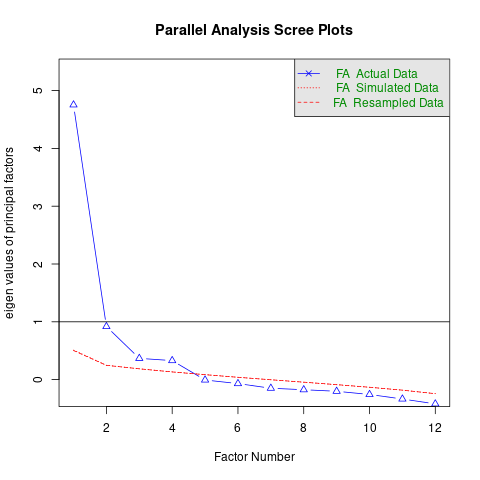

In [46]:
%%R
library(foreign)
library(psych)

# Cargamos los datos en el entorno R
dat <- read.spss("euthan.sav", to.data.frame = TRUE)

# Parallel Analysis with Psych package.
parallel <- fa.parallel(dat, n.iter=1000, fa="fa")

El método de análisis paralelo sugiere retener 4 factores. 

### Extracción de factores

Veamos ahora el resultado de extraer 4 factores:

In [64]:
fa = FactorAnalyzer(n_factors=4,rotation=None)
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], index=scaled_df.columns)
print("Cargas Factoriales:")
loadings

Cargas Factoriales:


,Factor 1,Factor 2,Factor 3,Factor 4
e1,0.746731,-0.259467,-0.016012,-0.302649
e2,0.769004,-0.364312,-0.000957,0.281676
e3,0.582640,0.402019,0.476606,-0.135526
e4,0.563172,0.291738,-0.274500,0.200396
e5,0.695196,-0.335919,0.061153,-0.179471
e6,0.722729,-0.310767,-0.009162,0.167908
e7,0.675575,0.398699,-0.465296,-0.188224
e8,0.577266,0.249788,-0.073649,0.274039
e9,0.717223,-0.183525,0.067337,-0.242321
e10,0.519157,-0.191664,0.062131,0.233505


Podemos apreciar que los factores se extraen en el orden de su varianza extraída. El primer factor tiende a ser un factor general con casi todas las variables cargadas de manera significativa, y representa la mayor cantidad de varianza. El segundo factor y los siguientes se basan entonces en la cantidad residual de varianza. 

Cada uno explica porciones de variación sucesivamente más pequeñas. Debemos tener en cuenta que el primer factor no es necesariamente más "importante" que los factores subsiguientes para cualquier otro propósito (por ejemplo, predicción), pero solo que representa la mayor varianza contabilizada en el conjunto de variables.

In [63]:
print("Comunalidades:")
pd.Series(fa.get_communalities(),index=df.columns.values)

Comunalidades:


e1     0.716783
e2     0.803432
e3     0.746609
e4     0.517782
e5     0.632088
e6     0.647191
e7     0.867293
e8     0.476151
e9     0.611344
e10    0.364644
e11    0.475865
e12    0.551824
dtype: float64

## Rotación de factores

El término rotación significa exactamente lo que implica. Específicamente, los ejes de referencia de los factores giran alrededor del origen hasta que se alcanza alguna otra posición.

El efecto final de rotar la matriz de factores es **redistribuir la varianza de los primeros factores a los últimos para lograr un patrón de factores más simple y teóricamente más significativo**.

### Tipos de rotación

El caso más simple de rotación es una rotación de factor ortogonal, en la que los ejes se mantienen a 90 grados. 

También es posible rotar los ejes y no retener el ángulo de 90 grados entre los ejes de referencia. Cuando no está limitado a ser ortogonal, el procedimiento de rotación se denomina rotación de factor oblicua.

Los dos tipos rotaciones se ilustran en la siguiente imagen tomada de Hair et al. (2019):

<p align="center">
  <img width="500" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/oblique.png" alt="Variable Types">
</p>

Al girar los ejes originales en el sentido de las agujas del reloj, como se indica en la figura, los ejes se mantienen a 90 grados. Este procedimiento significa que los factores son matemáticamente independientes y que la rotación ha sido ortogonal. Las cargas rotadas representan un patrón de carga de factores mucho más simplificado con variables que se cargan mucho solo en un solo factor.

La agrupación de estas variables en dos grupos es más obvio después de la rotación que antes, a pesar de que la posición o configuración relativa de las variables permanece sin cambios.

<p align="center">
  <img width="500" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/ortogonal.png" alt="Variable Types">
</p>

Sin embargo, el método de rotación oblicua es más flexible porque los ejes de los factores no necesitan ser ortogonales. También es más realista porque no se supone que las dimensiones subyacentes teóricamente importantes no estén correlacionadas entre sí.

Ten en cuenta que la rotación oblicua representa la agrupación de variables con mayor precisión. Esta precisión es el resultado del hecho de que cada eje factorial rotado ahora está más cerca del grupo respectivo de variables. Además, la solución oblicua proporciona información sobre la medida en que los factores están realmente correlacionados entre sí.

Los enfoques rotacionales ortogonales se utilizan más ampliamente porque todos los paquetes informáticos con análisis factorial contienen opciones de rotación ortogonal y conservan la ortogonalidad entre los factores. 

Esto es particularmente útil si se utilizan métodos de reducción de datos para crear puntuaciones para cada factor, ya que estas puntuaciones también son ortogonales (es decir, sin multicolinealidad), lo que puede ser beneficioso en otras técnicas multivariadas.

#### Métodos de extracción ortogonal

En la práctica, el objetivo de todos los métodos de rotación es simplificar las filas y columnas de la matriz de cargas factoriales para facilitar la interpretación. 

Al simplificar las filas, nos referimos a hacer tantos valores en cada fila lo más cerca posible de cero (es decir, maximizar la carga de una variable en un solo factor). Al simplificar las columnas, nos referimos a hacer tantos valores en cada columna tan cerca de cero como sea posible (es decir, hacer que el número de cargas altas sea lo menos posible).

Se han desarrollado tres enfoques ortogonales principales:

- Varimax: Se centra en simplificar las columnas de la matriz de factores.
- Quartimax: Se centra en simplificar las filas de la matriz de factores.
- Equimax: En lugar de concentrarse en la simplificación de las filas o de las columnas, intenta lograr un poco de ambas.

En general, el patrón factorial obtenido por la rotación VARIMAX tiende a ser más invariante que el obtenido por el método QUARTIMAX cuando se analizan diferentes subconjuntos de variables. 

**El método VARIMAX ha demostrado su eficacia como método analítico para obtener una rotación ortogonal de factores y es el método de rotación ortogonal más utilizado**. 

En contraste, EQUIMAX no ha ganado una aceptación generalizada y se usa con poca frecuencia.

Apliquemos la rotación ortogonal a nuestro ejemplo:

In [65]:
fa = FactorAnalyzer(n_factors=4,rotation="varimax")
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], index=scaled_df.columns)
print("Cargas Factoriales:")
loadings

Cargas Factoriales:


,Factor 1,Factor 2,Factor 3,Factor 4
e1,0.759255,0.234900,0.268340,0.114587
e2,0.428575,0.188419,0.759220,0.088539
e3,0.278379,0.216322,0.043672,0.787662
e4,0.055105,0.633675,0.298707,0.154838
e5,0.684145,0.117821,0.369717,0.116022
e6,0.453114,0.198522,0.627683,0.092095
e7,0.324917,0.866867,0.013462,0.100408
e8,0.042483,0.489038,0.387208,0.291991
e9,0.671468,0.210938,0.268763,0.209157
e10,0.239053,0.118731,0.523929,0.137473


Podemos apreciar como la rotación forzó las cargas factoriales a valores cercanos a cero para las variables no relacionadas a cada factor. 

Ahora veamos la estructura factorial gráficamente:

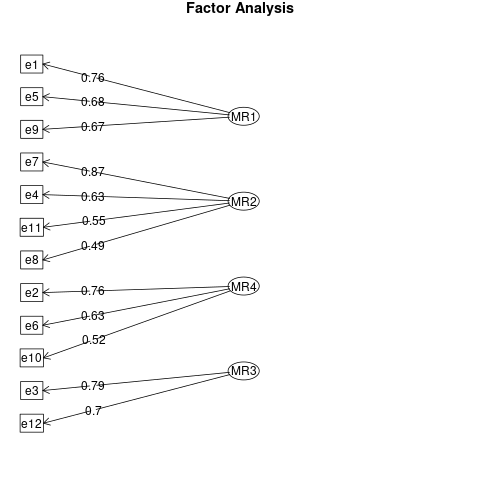

In [71]:
%%R
# Extrae los factores
fit <- fa(dat, nfactors=4,rotate="varimax")

# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.3)

#### Métodos de extracción oblicua

Las rotaciones oblicuas son similares a las rotaciones ortogonales, excepto que las rotaciones oblicuas **permiten factores correlacionados en lugar de mantener la independencia entre los factores rotados**.

Con la posibilidad de factores correlacionados, el investigador de factores debe tener un cuidado adicional para validar los factores rotados oblicuamente, porque **tienen una forma adicional (no ortogonalidad) de volverse específicos de la muestra y no generalizables, particularmente con muestras pequeñas**.

Se cuentan con algunas alternativas:

- Oblimin: Es la más común. 
- Promax: Se puede calcular más rápidamente que una rotación oblimin directa, por lo que es útil para grandes conjuntos de datos. 

Apliquemos la rotación oblicua a nuestro ejemplo:

In [87]:
fa = FactorAnalyzer(n_factors=4,rotation="oblimin")
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], index=scaled_df.columns)
print("Cargas Factoriales:")
loadings

Cargas Factoriales:


,Factor 1,Factor 2,Factor 3,Factor 4
e1,0.397107,0.201834,0.069122,0.492619
e2,0.918961,-0.017542,-0.022722,-0.019491
e3,-0.076456,0.028047,0.862679,0.101513
e4,0.232403,0.578918,0.034724,-0.260607
e5,0.518799,0.033631,0.075419,0.406685
e6,0.768151,0.035069,-0.002647,0.060743
e7,-0.074991,0.962508,-0.023864,0.062771
e8,0.329802,0.350162,0.203184,-0.290404
e9,0.367315,0.142194,0.179593,0.409873
e10,0.611126,-0.050136,0.072485,-0.069287


Dado que los factores no son necesariamente ortogonales, podemos explorar la correlación entre estos:

In [88]:
corr = pd.DataFrame(fa.phi_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'],index=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'])
print("Correalación entre factores:")
corr

Correalación entre factores:


,Factor 1,Factor 2,Factor 3,Factor 4
Factor 1,1.000000,0.464985,0.407983,0.302323
Factor 2,0.464985,1.000000,0.457979,0.171127
Factor 3,0.407983,0.457979,1.000000,0.130324
Factor 4,0.302323,0.171127,0.130324,1.000000


Además, podemos examinar la matriz de estructura, la cual muestra las correlaciones entre las variables observadas y los factores. 

> Nota: La matriz de estructura se puede obtener multiplicando la matriz de cargas factoriales por la matriz de correlación entre factores.

In [89]:
structure = pd.DataFrame(fa.structure_, columns=['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'], index=scaled_df.columns)
print("Matriz de estructura:")
structure

Matriz de estructura:


,Factor 1,Factor 2,Factor 3,Factor 4
e1,0.668088,0.502440,0.387771,0.656221
e2,0.895642,0.396020,0.341624,0.252369
e3,0.319233,0.404956,0.857561,0.195626
e4,0.436971,0.658288,0.360709,-0.086752
e5,0.688157,0.379000,0.355483,0.579114
e6,0.801742,0.401431,0.334723,0.298629
e7,0.381802,0.927451,0.394529,0.201700
e8,0.487722,0.546874,0.460258,-0.104296
e9,0.630618,0.465381,0.447990,0.568659
e10,0.596440,0.255369,0.289823,0.116338


Podemos sintetizar esta información gráficamente: 

R[write to console]: Loading required namespace: GPArotation



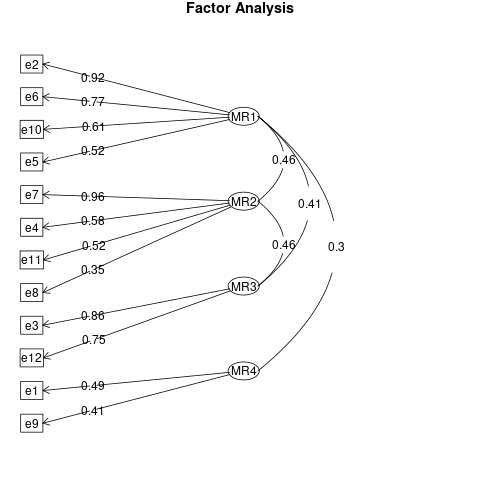

In [93]:
%%R
# Extrae los factores
fit <- fa(dat, nfactors=4,rotate="oblimin")

# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.3)

## Interpretación de Factores

